# Mtcars EDA

The objective of this project is to understand the various aspects of the 'mtcars' dataset and to perform simple and multiple linear regression analysis, to train the model thus helping to predict the fuel efficiency (miles per gallon) of car models based on their specifications.

In [1]:
#Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

## Data Exploration

This initial step involves loading of dataset and understanding the various features and its datatypes. We need to check on for any missing or null values and if any preprocessing methods need to be performed for efficient model training.

In [2]:
# Load the mtcars dataset
mtcars = pd.read_csv(r'C:\Users\Owner\Downloads\mtcars.csv')

# Display the structure of the dataset
print("Dataset Structure:")
print(mtcars.info())

Dataset Structure:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32 entries, 0 to 31
Data columns (total 12 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   model   32 non-null     object 
 1   mpg     32 non-null     float64
 2   cyl     32 non-null     int64  
 3   disp    32 non-null     float64
 4   hp      32 non-null     int64  
 5   drat    32 non-null     float64
 6   wt      32 non-null     float64
 7   qsec    32 non-null     float64
 8   vs      32 non-null     int64  
 9   am      32 non-null     int64  
 10  gear    32 non-null     int64  
 11  carb    32 non-null     int64  
dtypes: float64(5), int64(6), object(1)
memory usage: 3.1+ KB
None


In [3]:
# Number of observations and variables
observations, variables = mtcars.shape
print(f"\nNumber of Observations: {observations}")
print(f"Number of Variables: {variables}")


Number of Observations: 32
Number of Variables: 12


In [4]:
# Check null values
mtcars.isnull().sum()

model    0
mpg      0
cyl      0
disp     0
hp       0
drat     0
wt       0
qsec     0
vs       0
am       0
gear     0
carb     0
dtype: int64

There are no missing/null values in the dataset so good to proceed further.

In [5]:
# Summary statistics
summary_stats = mtcars.describe()
summary_stats

,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
count,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.0000
mean,20.090625,6.187500,230.721875,146.687500,3.596563,3.217250,17.848750,0.437500,0.406250,3.687500,2.8125
std,6.026948,1.785922,123.938694,68.562868,0.534679,0.978457,1.786943,0.504016,0.498991,0.737804,1.6152
min,10.400000,4.000000,71.100000,52.000000,2.760000,1.513000,14.500000,0.000000,0.000000,3.000000,1.0000
25%,15.425000,4.000000,120.825000,96.500000,3.080000,2.581250,16.892500,0.000000,0.000000,3.000000,2.0000
50%,19.200000,6.000000,196.300000,123.000000,3.695000,3.325000,17.710000,0.000000,0.000000,4.000000,2.0000
75%,22.800000,8.000000,326.000000,180.000000,3.920000,3.610000,18.900000,1.000000,1.000000,4.000000,4.0000
max,33.900000,8.000000,472.000000,335.000000,4.930000,5.424000,22.900000,1.000000,1.000000,5.000000,8.0000


Miles Per Gallon (mpg): The average fuel efficiency for the cars in the dataset is approximately 20.09 miles per gallon, with a minimum of 10.4 mpg and a maximum of 33.9 mpg. This indicates a wide range of fuel efficiencies.

Cylinders (cyl): On average, the cars have around 6.19 cylinders in their engines, with a minimum of 4 and a maximum of 8 cylinders.

Displacement (disp): The average engine displacement is approximately 230.72 cubic inches, with values ranging from 71.1 to 472 cubic inches.

Horsepower (hp): The average horsepower for the cars is about 146.69, with a minimum of 52 and a maximum of 335 horsepower.

Rear Axle Ratio (drat): The average rear axle ratio is 3.60, with values ranging from 2.76 to 4.93. This ratio affects acceleration and fuel efficiency.

Weight (wt): The average weight of the cars is approximately 3.22 thousand pounds, with a minimum of 1.51 thousand pounds and a maximum of 5.42 thousand pounds.

Quarter Mile Time (qsec): The average quarter-mile time is about 17.85 seconds, with values ranging from 14.5 to 22.9 seconds.

V/S (Vee/Straight): The 'vs' variable is binary, with a 0 indicating "straight" engine configuration and 1 indicating "vee" engine configuration. About 43.75% of the cars have a "vee" configuration.

Transmission Type (am): The 'am' variable is also binary, with 0 indicating automatic transmission and 1 indicating manual transmission. Approximately 40.63% of the cars have manual transmissions.

Number of Forward Gears (gear): The number of forward gears ranges from 3 to 5, with the most common being 3 and 4 gears.

Number of Carburetors (carb): The number of carburetors in the cars' engines ranges from 1 to 8, with most cars having 2, 4, or 1 carburetors.

C:\Users\Owner\AppData\Local\Temp\ipykernel_7216\1636491953.py:6: UserWarning: FixedFormatter should only be used together with FixedLocator
  plot.set_xticklabels(plot.get_xticklabels(), rotation=90)


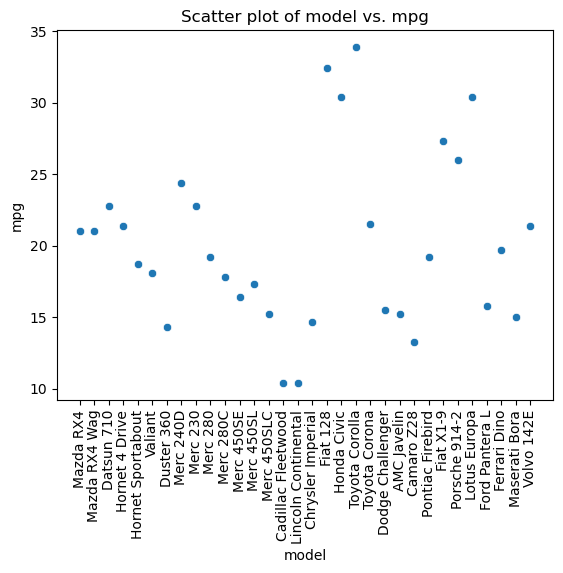

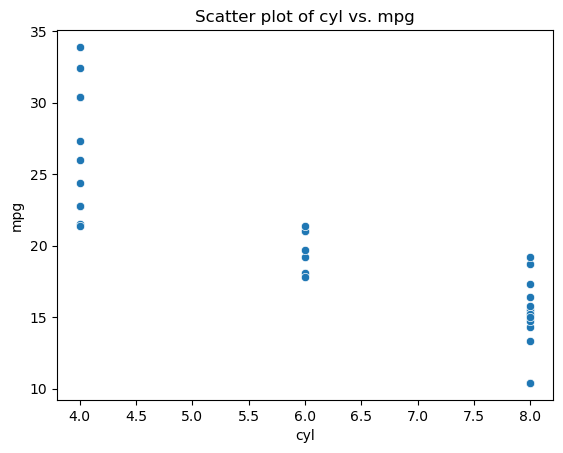

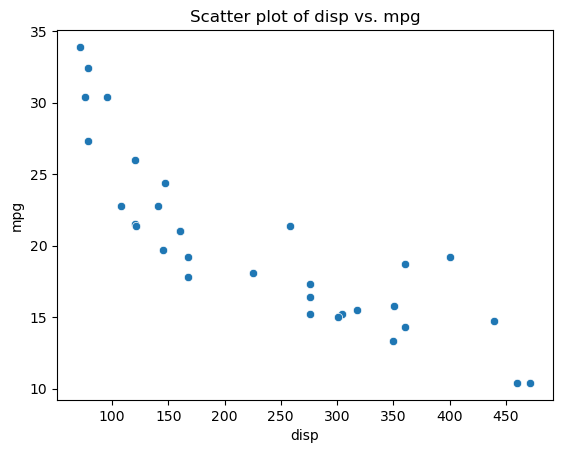

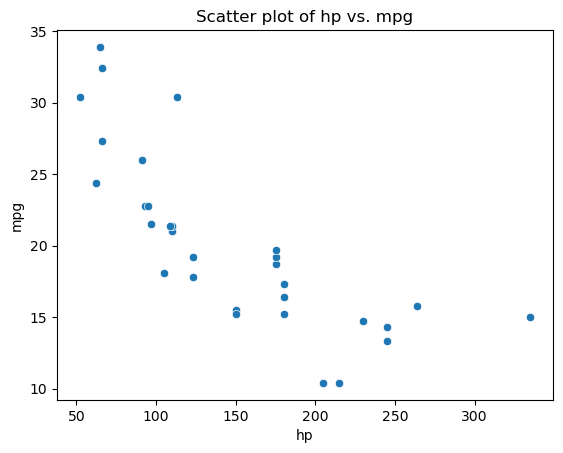

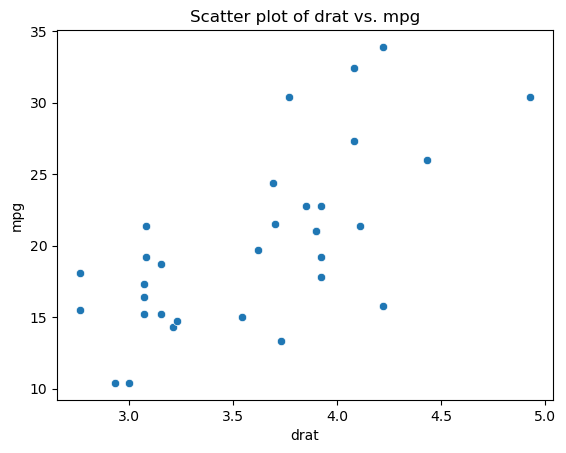

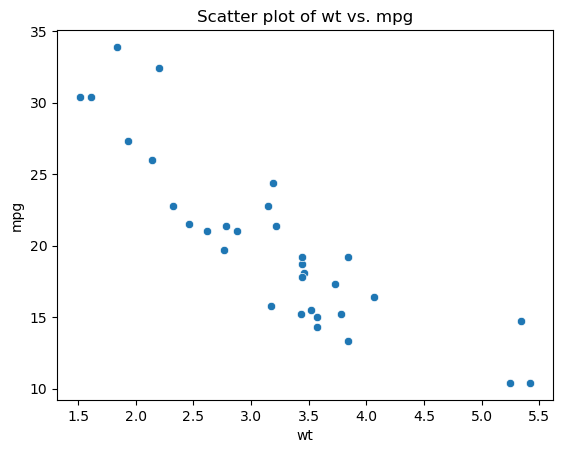

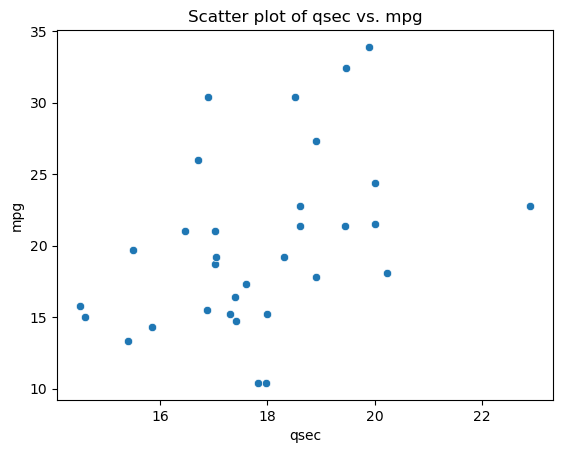

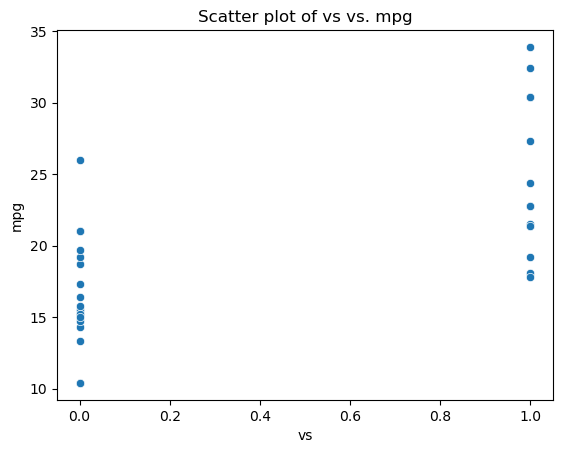

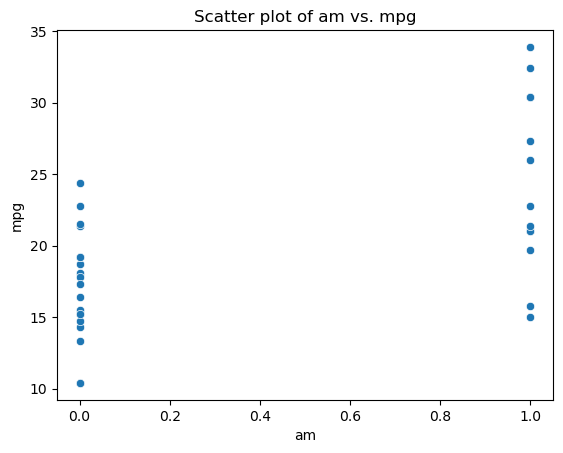

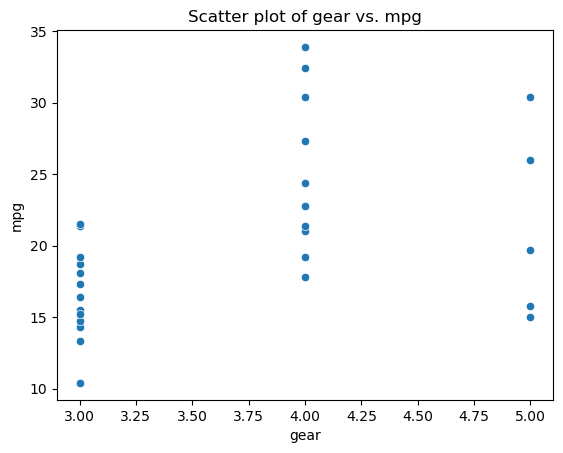

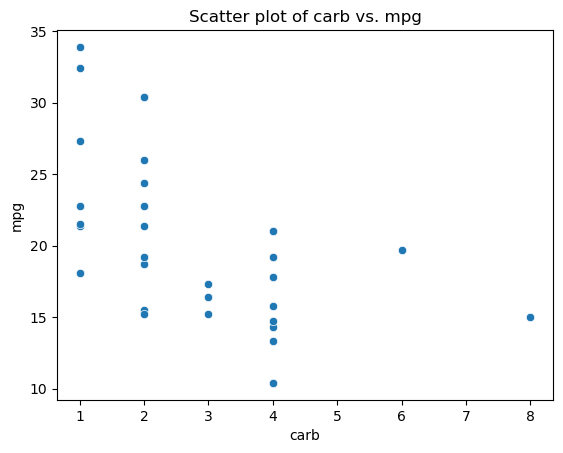

In [6]:
# Scatter plots for relationships between independent variables and target variable (mpg)
for variable in mtcars.columns:
    if variable != 'mpg':
        plot = sns.scatterplot(data=mtcars, x=variable, y='mpg')
        if variable == 'model':
            plot.set_xticklabels(plot.get_xticklabels(), rotation=90)
        plt.title(f'Scatter plot of {variable} vs. mpg')
        
        plt.show()

For visualization and better understanding the relationship of features with target variable, we do scatterplot. From this we could rule out am, model and vs variables as they do not follow any linear relation to mpg. To understand which independent variable is better to train the simple linear regression model, we need to see the correlation between them.

In [7]:
# Correlation
mtcars.select_dtypes(['number']).corr()

,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
mpg,1.000000,-0.852162,-0.847551,-0.776168,0.681172,-0.867659,0.418684,0.664039,0.599832,0.480285,-0.550925
cyl,-0.852162,1.000000,0.902033,0.832447,-0.699938,0.782496,-0.591242,-0.810812,-0.522607,-0.492687,0.526988
disp,-0.847551,0.902033,1.000000,0.790949,-0.710214,0.887980,-0.433698,-0.710416,-0.591227,-0.555569,0.394977
hp,-0.776168,0.832447,0.790949,1.000000,-0.448759,0.658748,-0.708223,-0.723097,-0.243204,-0.125704,0.749812
drat,0.681172,-0.699938,-0.710214,-0.448759,1.000000,-0.712441,0.091205,0.440278,0.712711,0.699610,-0.090790
wt,-0.867659,0.782496,0.887980,0.658748,-0.712441,1.000000,-0.174716,-0.554916,-0.692495,-0.583287,0.427606
qsec,0.418684,-0.591242,-0.433698,-0.708223,0.091205,-0.174716,1.000000,0.744535,-0.229861,-0.212682,-0.656249
vs,0.664039,-0.810812,-0.710416,-0.723097,0.440278,-0.554916,0.744535,1.000000,0.168345,0.206023,-0.569607
am,0.599832,-0.522607,-0.591227,-0.243204,0.712711,-0.692495,-0.229861,0.168345,1.000000,0.794059,0.057534
gear,0.480285,-0.492687,-0.555569,-0.125704,0.699610,-0.583287,-0.212682,0.206023,0.794059,1.000000,0.274073


Out of the continuous variables, disp, wt and hp and highly correlated to mpg than others. So we need to see which of these can give a better score to the model after training.

## Simple Linear Regression

Simple linear regression is a statistical method used to model the relationship between a single independent variable and the dependent variable (mpg). We proceed with the variable that is highly correlated to mpg. To be noted, there is a negative correlation between weight of the cars and mpg.

In [8]:
# Selecting an independent and dependent variable
X_simple = mtcars[['wt']]
y=mtcars['mpg']

We always need to make sure the independent variable should be in the form of dataframe or 2 dimensional array while dependent variables can be series or 1 dimensional array.

In [9]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_simple, mtcars['mpg'], test_size=0.25, random_state=42)
X_train.shape

(24, 1)

In [10]:
# Standardization
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
X_train=scaler.fit_transform(X_train)

In linear regression analysis, it's essential to address the issue of differing units of measurement for different variables. These variations in units can impact the effectiveness of gradient descent, a common optimization technique used to find the global minimum in the model. When an independent variable possesses a significantly higher scale, it can substantially slow down the convergence process, leading to suboptimal solutions.

To mitigate this problem and facilitate a more efficient optimization process, we apply a standardization technique known as the Z-score transformation. This formula recalibrates each independent variable or feature by centering its distribution around a mean of 0 and scaling it to have a standard deviation of 1. By employing the Z-score transformation, we ensure that all variables are on a consistent scale, allowing gradient descent to work more effectively and converge efficiently towards the global minimum, thus enhancing the suitability and performance of our linear regression model.

prediction of test data
predicted height output= intercept +coef_(Weights)
y_pred_test =156.470 + 17.29(X_test)

In [11]:
X_test=scaler.transform(X_test)
X_test

array([[-0.44794364],
       [ 2.36643966],
       [ 0.69201946],
       [-1.05238918],
       [-0.04497994],
       [ 0.26254499],
       [ 0.40040099],
       [-1.33340334]])

In the process of preparing and standardizing our test data for evaluation, we apply the same formula used for training data, known as the Z-score transformation. However, there is a difference in how we apply this formula to the test data.

To ensure that the test data remains independent and unbiased in its evaluation, we employ the **transform()** function, which utilizes the mean and standard deviation derived from the training dataset. This means that the test data is standardized using the parameters established during the training phase. This approach is critical in preventing what is commonly referred to as "data leakage."

Data leakage is a concept that we aim to avoid. If we were to use "fit_transform()" on the test data, it would recalculate the mean and standard deviation based on the test dataset itself. This is not desirable, as it would introduce knowledge from the test data into the training process, potentially compromising the integrity of our model evaluation. In essence, we want to ensure that our training data remains blind to any specifics of the test data thus maintaining the integrity of the evaluation process.

In [12]:
## Apply the ML algorithm - linear algorithm
# Create and train the simple linear regression model
simple_model = LinearRegression()
simple_model.fit(X_train, y_train)

LinearRegression()

In [13]:
# Get the coefficients
slope = simple_model.coef_
intercept = simple_model.intercept_
print(f"Slope: {slope}, Intercept: {intercept}")

Slope: [-4.99448797], Intercept: 19.870833333333334


This implies that one unit movement in the wt value leads to -4.994 movement in mpg value.

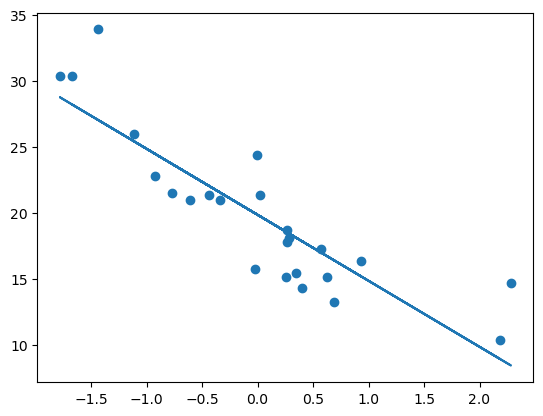

In [14]:
# Plot training best fit line
plt.scatter(X_train,y_train)
plt.plot(X_train, simple_model.predict(X_train))

The best fit line on training data is as plotted above and few outliers can also be observed.

### Prediction on Test Data

Predicted weight output = intercept+coef_(mpg)

y_pred_simple = 19.87+(-4.99)(mpg)

In [15]:
# Predictions on the test set
y_pred_simple = simple_model.predict(X_test)

# Evaluate the model
mse_simple = metrics.mean_squared_error(y_test, y_pred_simple)
mae_simple = metrics.mean_absolute_error(y_test,y_pred_simple)
rmse_simple = np.sqrt(mse_simple)
print(f"Mean Squared Error: {mse_simple}")
print(f"Mean Absolute Error: {mae_simple}")
print(f"Root Mean Squared Error: {rmse_simple}")

Mean Squared Error: 11.066073566315215
Mean Absolute Error: 2.7250461336521874
Root Mean Squared Error: 3.3265708419204323


As we can see here, Mean Squared Error is too high so it has penalised a lot of outliers whereas the Mean Absolute Error and Root Mean Squared Error are almost nearby.

#### R-Squared

R^2=1-SSR/SST

R^2 -> Coefficient of determination;
SSR -> Sum of squares of residuals;
SST -> Total sum of squares

In [16]:
# R-Squared
from sklearn.metrics import r2_score

score=r2_score(y_test,y_pred_simple)
score

0.730850697645258

In [17]:
# Adjusted R-Squared
1- (1- score)*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)

0.6859924805861344

#### OLS Linear Regression

OLS is "Ordinary Least Squares," and its a common method used in linear regression analysis to estimate the coefficients of a linear regression model. OLS linear regression seeks to find the best-fitting linear relationship between the independent variables (wt) and the dependent variable (mpg) by minimizing the sum of squared differences between the observed and predicted values.

In [18]:
## OLS Linear Regression
import statsmodels.api as sm

model=sm.OLS(y_train,X_train).fit()
prediction=model.predict(X_test)
prediction

array([  2.2372491 , -11.81915441,  -3.45628284,   5.25614511,
         0.22465176,  -1.31127778,  -1.99979793,   6.65966694])

In [19]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                    mpg   R-squared (uncentered):                   0.058
Model:                            OLS   Adj. R-squared (uncentered):              0.017
Method:                 Least Squares   F-statistic:                              1.424
Date:                Thu, 26 Oct 2023   Prob (F-statistic):                       0.245
Time:                        20:21:33   Log-Likelihood:                         -106.04
No. Observations:                  24   AIC:                                      214.1
Df Residuals:                      23   BIC:                                      215.3
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1            -4.9945      4.186     -1.193      0.245     -13.653       3.664
==============================================================================
Omnibus:                        3.866   Durbin-Watson:                   0.059
Prob(Omnibus):                  0.145   Jarque-Bera (JB):                2.617
Skew:                           0.805   Prob(JB):                        0.270
Kurtosis:                       3.165   Cond. No.                         1.00
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [20]:
# Predict new values
simple_model.predict([[4]])

array([-0.10711853])

In [21]:
simple_model.predict(scaler.transform([[4]]))

C:\Users\Owner\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


array([15.59362263])

## Multiple Linear Regression 

Multiple linear regression is a statistical method used to model and analyze the relationships between the dependent variable (mpg) and two or more independent variables simultaneously. It extends the principles of simple linear regression, to a more complex real-world scenario where multiple factors influence the outcome.

In [22]:
# Selecting multiple independent variables
df_index = mtcars[['hp', 'disp', 'drat', 'wt', 'mpg']]

In [23]:
df_index.head()

,hp,disp,drat,wt,mpg
0,110,160.0,3.90,2.620,21.0
1,110,160.0,3.90,2.875,21.0
2,93,108.0,3.85,2.320,22.8
3,110,258.0,3.08,3.215,21.4
4,175,360.0,3.15,3.440,18.7


In [24]:
# Check null values
df_index.isnull().sum()

hp      0
disp    0
drat    0
wt      0
mpg     0
dtype: int64

C:\Users\Owner\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


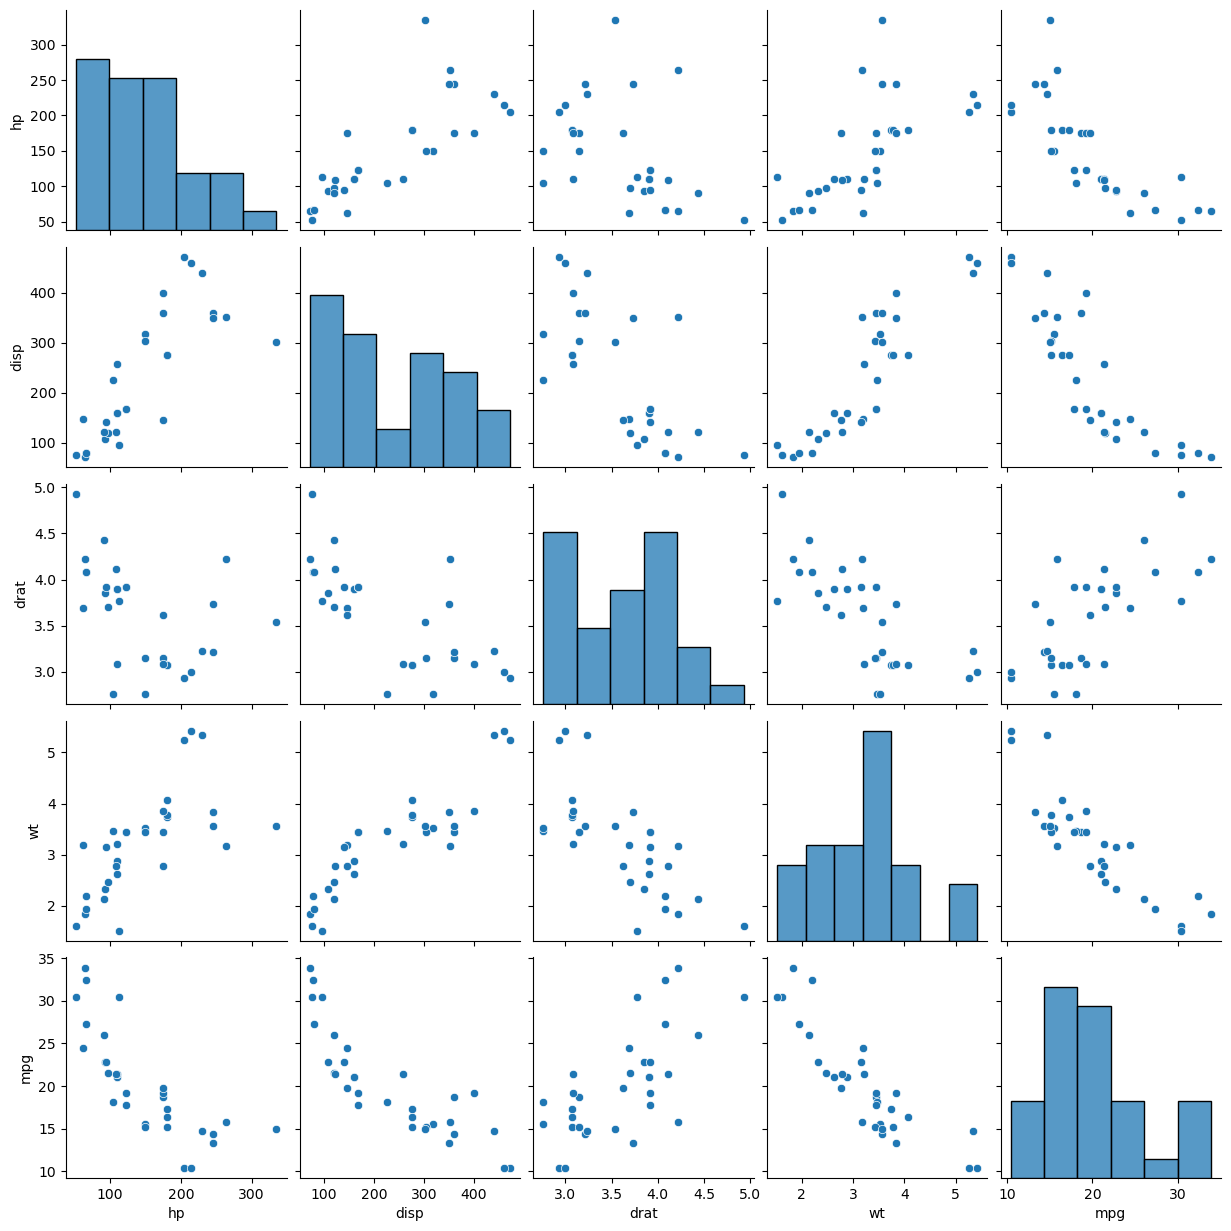

In [25]:
# Visualization
import seaborn as sns
sns.pairplot(df_index)

In [26]:
# Correlation
df_index.corr()

,hp,disp,drat,wt,mpg
hp,1.000000,0.790949,-0.448759,0.658748,-0.776168
disp,0.790949,1.000000,-0.710214,0.887980,-0.847551
drat,-0.448759,-0.710214,1.000000,-0.712441,0.681172
wt,0.658748,0.887980,-0.712441,1.000000,-0.867659
mpg,-0.776168,-0.847551,0.681172,-0.867659,1.000000


In [27]:
# Independent and dependent features
X=df_index.iloc[:,:-1]
y=df_index.iloc[:,-1]

In [28]:
# Split the data
X_train_multi, X_test_multi, y_train_multi, y_test_multi = train_test_split(X, y, test_size=0.25, random_state=42)

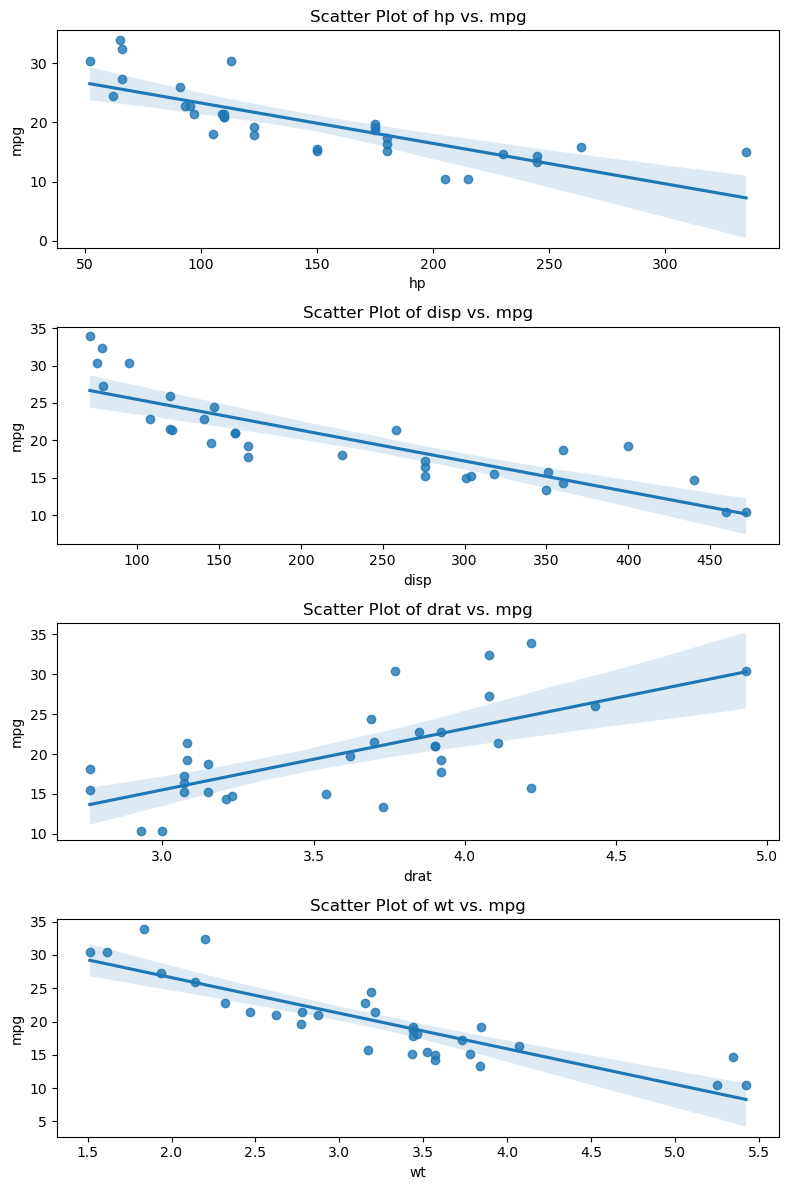

In [29]:
# Regression plots
fig, axes = plt.subplots(nrows=len(X.columns), ncols=1, figsize=(8, 12))

for i, column in enumerate(X):
    sns.regplot(x=X[column], y=df_index['mpg'], ax=axes[i])
    axes[i].set_title(f'Scatter Plot of {column} vs. mpg')

plt.tight_layout()
plt.show()


The regression plots for the independent variables against the target variable mpg is shown aboe. In regression plot, the straight line represents the "best-fit line". It summarizes the relationship between the independent and dependent variable in a linear regression model. The shaded portion around the regression line represents "confidence intervals," which provide a range of values within which we can be reasonably confident that the true relationship between the variables lies. The graphs plotted have a narrower shaded region thus implying greater confidence in the estimated regression line.

Scatter Plot of "hp" vs. mpg reveals a negative linear relationship, indicating that as horsepower increases, mpg tends to decrease. This suggests that higher horsepower engines are generally associated with lower fuel efficiency.

Scatter Plot of "disp" vs. mpg also follows similar trend wherein as engine displacement increases, there is a decrease in fuel efficiency. This suggests that larger engine sizes are associated with lower mpg.

Scatter Plot of "drat" vs. mpg shows a positive linear relationship. As the rear axle ratio increases, mpg also increase. This implies that vehicles with higher rear axle ratios tend to have better fuel efficiency.

Scatter Plot of "wt" vs. mpg indicates a clear negative linear relationship. Heavier vehicles are generally associated with lower fuel efficiency, as indicated by the downward trend in the plot.

In [30]:
# Standardization
scaler=StandardScaler()
X_train_multi=scaler.fit_transform(X_train_multi)
X_test_multi=scaler.transform(X_test_multi)

In [31]:
# Create and train the multiple linear regression model
regression=LinearRegression()
regression.fit(X_train_multi,y_train_multi)

LinearRegression()

In [32]:
## Cross validation
from sklearn.model_selection import cross_val_score

validation_score=cross_val_score(regression,X_train_multi,y_train_multi,scoring='neg_mean_squared_error',
                                cv=3)
validation_score

array([-13.63985058,  -7.19963062,  -9.42347694])

In the process of cross-validation, a method employed for evaluating the performance of a predictive model, the training dataset undergoes a specific division into subsets. This division is determined by the value of "cv," which represents the number of partitions or "folds."

For instance, if the training dataset comprises 24 data points and "cv" is set to 3, then the validation process is executed in three distinct iterations, or selections. In each selection within the traing data, a different portion of the data is set aside for testing, while the remainder serves as the training data itself.

1) In the first selection, the first 6 data points are designated as the validation or test set, while the remaining 18 data points constitute the training set. This forms the initial fold for evaluation.

2) For the second selection, the subsequent 6 data points are assigned as the test set, while the remaining 18 remain in the training set. This marks the second fold for assessment.

3) The process is repeated one final time. In the third and last selection, the last 6 data points are set apart for testing, leaving the remaining 18 as the training data. This represents the third and final fold.

During each fold, model performance is evaluated using a specific scoring metric, such as negative mean squared error (MSE). The performance scores obtained in each selection are typically averaged to provide an overall assessment of the model's quality. 

In [33]:
np.mean(validation_score)

-10.087652714533876

In [34]:
# Prediction of test data
y_pred_multi=regression.predict(X_test_multi)

In [35]:
# Performance Metrics
from sklearn.metrics import mean_absolute_error,mean_squared_error

mse=mean_squared_error(y_test_multi,y_pred_multi)
mae=mean_absolute_error(y_test_multi,y_pred_multi)
rmse=np.sqrt(mse)
print(f"Mean Squared Error: {mse}")
print(f"Mean Absolute Error: {mae}")
print(f"Root Mean Squared Error: {rmse}")

Mean Squared Error: 7.868940445563197
Mean Absolute Error: 1.9278382399183396
Root Mean Squared Error: 2.8051631762810514


Mean Squared Error is too high so it has penalised a lot of outliers whereas the Mean Absolute Error and Root Mean Squared Error are almost nearby.

In [36]:
# R-Squared
from sklearn.metrics import r2_score
score_multi=r2_score(y_test_multi,y_pred_multi)
print(score_multi)

#Display adjusted R-squared
print(1 - (1-score_multi)*(len(y_test_multi)-1)/(len(y_test_multi)-X_test_multi.shape[1]-1))

0.8086114448361134
0.5534267046175978


### Assumptions

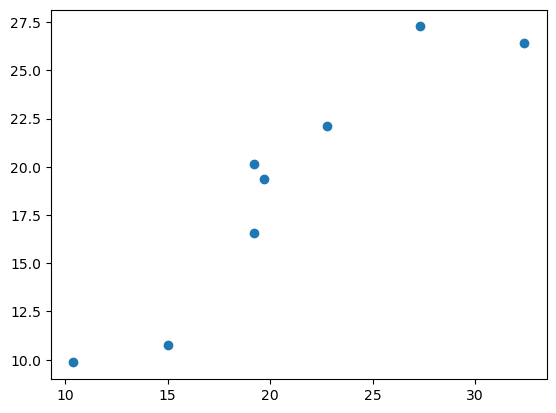

In [37]:
plt.scatter(y_test_multi,y_pred_multi)

Now let us consider some assumptions.

1) When we check the scatterplot between y_test_multi and y_pred_multi, we can observe it follows a linear relationship. Thus, we are able to conclude this model will perform well. 

In [38]:
# Residuals
residuals=y_test_multi-y_pred_multi
print(residuals)

29    0.318687
15    0.545117
24    2.657234
17    6.004984
8     0.677344
9    -0.939083
30    4.253316
25    0.026943
Name: mpg, dtype: float64


C:\Users\Owner\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


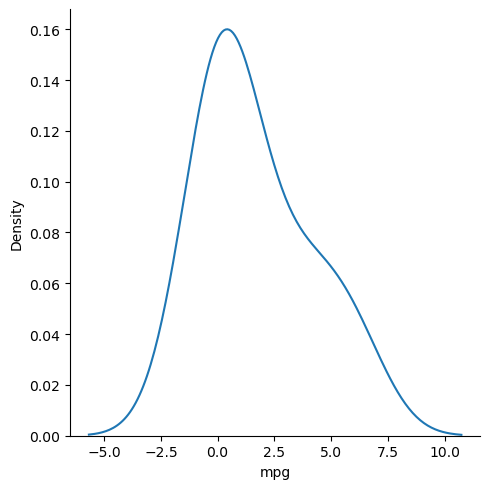

In [39]:
# Plot this residuals
sns.displot(residuals,kind='kde')

2) When the KDE plot of residuals exhibits a bell-shaped, symmetric curve resembling a normal distribution, it is an indicative of a well-fitting model.

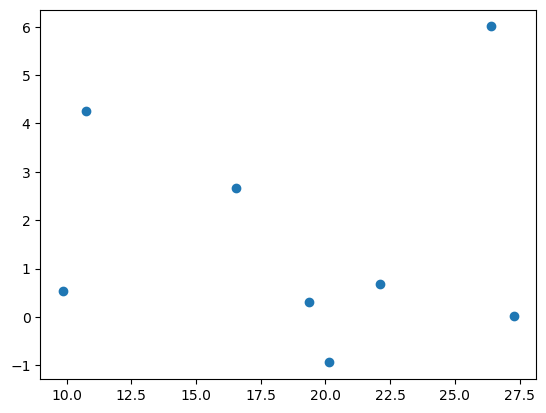

In [40]:
# Scatterplot with respect to prediction and residuals
plt.scatter(y_pred_multi,residuals)

3) As the scatterplot of the residuals and y_pred_multi is not following any pattern and is uniformly distributed, we can say it is also an indicative of a good model.

In [41]:
# OLS Linear Regression
import statsmodels.api as sm
model=sm.OLS(y_train_multi,X_train_multi).fit()

In [42]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                    mpg   R-squared (uncentered):                   0.065
Model:                            OLS   Adj. R-squared (uncentered):             -0.123
Method:                 Least Squares   F-statistic:                             0.3450
Date:                Thu, 26 Oct 2023   Prob (F-statistic):                       0.844
Time:                        20:21:53   Log-Likelihood:                         -105.96
No. Observations:                  24   AIC:                                      219.9
Df Residuals:                      20   BIC:                                      224.6
Df Model:                           4                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1            -2.6061     10.123     -0.257      0.799     -23.722      18.510
x2             0.7963     15.333      0.052      0.959     -31.187      32.780
x3             1.0718      6.706      0.160      0.875     -12.916      15.059
x4            -3.1172     10.237     -0.304      0.764     -24.472      18.237
==============================================================================
Omnibus:                        7.058   Durbin-Watson:                   0.034
Prob(Omnibus):                  0.029   Jarque-Bera (JB):                5.218
Skew:                           1.106   Prob(JB):                       0.0736
Kurtosis:                       3.571   Cond. No.                         7.38
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [43]:
regression.coef_

array([-2.6061331 ,  0.79625734,  1.07179281, -3.11723026])

The derived coefficients match with the coefficients highlighted in the OLS regression result.

## Discussion and Conclusion 

In [45]:
# Compare the two models
print(f"Simple Model - Mean Absolute Error: {mae_simple}, R-squared: {score}")
print(f"Multiple Model - Mean Absolute Error: {mae}, R-squared: {score_multi}")

Simple Model - Mean Absolute Error: 2.7250461336521874, R-squared: 0.730850697645258
Multiple Model - Mean Absolute Error: 1.9278382399183396, R-squared: 0.8086114448361134


Performance:

The multiple linear regression model outperforms the simple linear regression model in terms of predictive accuracy. It has lower values for MSE, MAE, and RMSE, indicating that it provides more accurate predictions. The R^2 value for the multiple linear regression model (0.8086) is higher than that of the simple linear regression model (0.7309), suggesting that the multiple linear regression model explains a larger proportion of the variance in the dependent variable (mpg).

Interpretability: 

The simple linear regression model is more interpretable because it involves only one independent variable (weight), making it easier to understand and communicate the relationship between the independent weight variable and fuel efficiency.

Trade-offs:

The simple linear regression model is more interpretable and straightforward. It provides a clear and direct relationship between weight and mpg. However, it may not capture all small details in the data, resulting in a slightly lower R-squared value.

The multiple linear regression model is more complex due to the inclusion of multiple independent variables. It offers a higher R-squared value, indicating a better overall fit to the data. However, it may be more challenging to interpret due to the combined effects of multiple variables.

Insights:

This project has helped gain valuable insights into the process of predicting fuel efficiency (miles per gallon) in car models using linear regression analysis. The mtcars dataset contains information about various car specifications, and our objective was to the target variable mpg based on these characteristics. In the simple linear regression model, we selected "weight" as the independent variable after analysing the correlation of independent variables to mpg and found a reasonable but not highly predictive relationship between weight and mpg. The multiple linear regression model used a combination of independent variables, including "hp", "disp", "drat", and "wt". This model demonstrated improved predictive performance compared to the simple model. After training the models, various performance metrics, such as Mean Squared Error (MSE), Mean Absolute Error (MAE), Root Mean Squared Error (RMSE), and R-squared, were used to assess them. The multiple linear regression model outperformed the simple model with a higher R-squared value and lower error metrics, indicating better predictive accuracy.

Implications for Predicting Fuel Efficiency in Car Models:

The multiple linear regression model with "hp", "disp", "drat", and "wt" as independent variables seems to provide better predictions of fuel efficiency (mpg) for the given dataset. It has a higher R-squared value and lower error metrics, suggesting improved accuracy in predicting mpg.

The simple linear regression model with "weight" as the independent variable can be a valuable tool when interpretability and simplicity are preferred. It still offers a reasonable level of predictability, with an R-squared value of 0.731.

The choice between simplicity and complexity depends on the specific application and the level of detail required in predictions. For initial exploratory analysis, the simple model might suffice. However, for more accurate and detailed predictions, the multiple linear regression model is preferred.